In [ ]:
import tensorflow as tf
import os
from tensorflow import keras
import numpy as np
from tensorflow.python.keras.applications.mobilenet import preprocess_input
from keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
!pip install adabelief-tf==0.1.0
from adabelief_tf import AdaBeliefOptimizer
from matplotlib import pyplot as plt
from sklearn import metrics
import itertools
image_size = 224



In [ ]:
!git clone https://github.com/prajnasb/observations.git

Cloning into 'observations'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1638 (delta 9), reused 0 (delta 0), pack-reused 1604
Receiving objects: 100% (1638/1638), 75.94 MiB | 50.07 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [ ]:
!git clone https://YasserJaber98:@github.com/MrTARIQSs/ICS381Project.git

Cloning into 'ICS381Project'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 124 (delta 21), reused 31 (delta 13), pack-reused 84
Receiving objects: 100% (124/124), 114.91 MiB | 45.22 MiB/s, done.
Resolving deltas: 100% (59/59), done.


To here

In [ ]:
!git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git

Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 3808, done.
remote: Total 3808 (delta 0), reused 0 (delta 0), pack-reused 3808
Receiving objects: 100% (3808/3808), 150.98 MiB | 19.27 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!cp -a /content/Face-Mask-Detection/dataset/with_mask/. /content/observations/experiements/dest_folder/train/with_mask/
!cp -a /content/Face-Mask-Detection/dataset/without_mask/. /content/observations/experiements/dest_folder/train/without_mask

In [ ]:
# Generate training data by augmentation
train_augmentator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    channel_shift_range=0.5)

# Generate validation data by augmentation
validation_augmentator = ImageDataGenerator()




In [ ]:
# read the label for images
def img_path(path):
    for dirname, _, filenames in os.walk(path):
        l = []
        y = []
        for filename in filenames:
            l.append(os.path.join(dirname, filename))
            y.append(os.path.join(dirname, filename).split("/")[-2])
        return (l, y)

    # resize and prepare input images


def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return (output)

    # define training  validation data


l_img_path, out_y = img_path(
    "/content/observations/experiements/dest_folder/train/with_mask/")
x, y = img_path(
    "/content/observations/experiements/dest_folder/train/without_mask/")
l_img_path = l_img_path + x
out_y = out_y + y
x, y = img_path(
    "/content/observations/experiements/dest_folder/test/with_mask/")
l_img_path = l_img_path + x
out_y = out_y + y
x, y = img_path(
    "/content/observations/experiements/dest_folder/test/without_mask/")
l_img_path = l_img_path + x
out_y = out_y + y
out_x = read_and_prep_images(l_img_path)
xval1, yval1 = img_path(
    "/content/observations/experiements/dest_folder/val/with_mask/")
xvali, yval = img_path(
    "/content/observations/experiements/dest_folder/val/without_mask/")
yval = yval + yval1
xvali = xvali + xval1
xval = read_and_prep_images(xvali)

# labelize output
for i in range(len(out_y)):
    if out_y[i] == "with_mask":
        out_y[i] = 1
    else:
        out_y[i] = 0

for i in range(len(yval)):
    if yval[i] == "with_mask":
        yval[i] = 1
    else:
        yval[i] = 0

    # convert to categorical in form [1, 0] or [0, 1]
out_y = keras.utils.to_categorical(out_y, 2)
yval = keras.utils.to_categorical(yval, 2)







/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
out_y.shape

(4804, 2)

In [ ]:
model = tf.keras.Sequential([
    Conv2D(16, kernel_size=3, strides=(1, 1), input_shape=(224, 224, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(32, kernel_size=3, strides=(1, 1)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(64, kernel_size=3, strides=(1, 1)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, kernel_size=3, strides=(1, 1)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, kernel_size=3, strides=(1, 1)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, kernel_size=3, strides=(1, 1)),
    BatchNormalization(),
    ReLU(),
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Flatten(name="flatten"),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dropout(0.2),
    Dense(2, activation='softmax')
])



In [ ]:
optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-6, rectify=False)

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=["accuracy"])

checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer



In [ ]:
train = model.fit_generator(train_augmentator.flow(out_x, out_y, batch_size=64), epochs=50,
                            validation_data=validation_augmentator.flow(xval, yval),workers=8, shuffle=True, callbacks=[checkpoint] )

Epoch 1/50
76/76 [==============================] - 25s 323ms/step - loss: 0.0720 - accuracy: 0.9765 - val_loss: 1.0441 - val_accuracy: 0.7817
Epoch 2/50
76/76 [==============================] - 24s 316ms/step - loss: 0.1015 - accuracy: 0.9644 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 3/50
76/76 [==============================] - 23s 308ms/step - loss: 0.0765 - accuracy: 0.9754 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/50
76/76 [==============================] - 23s 304ms/step - loss: 0.0624 - accuracy: 0.9790 - val_loss: 0.0226 - val_accuracy: 0.9930
Epoch 5/50
76/76 [==============================] - 24s 314ms/step - loss: 0.0820 - accuracy: 0.9711 - val_loss: 0.0695 - val_accuracy: 0.9648
Epoch 6/50
76/76 [==============================] - 23s 308ms/step - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/50
76/76 [==============================] - 23s 299ms/step - loss: 0.0906 - accuracy: 0.9692 - val_loss: 0.0433 - val_accuracy: 0.9789

In [ ]:
img_paths = [
    '/content/person-wearing-a-mask.jpeg',  # true out = [0 1]
    '/content/5f120523682a4.image.jpeg', # true out = [1 0]
    '/content/1.jpeg',# true out = [0 1]
    '/content/2.jpeg',# true out = [0 1]
    '/content/3.jpeg']  # true out = [0 1]
test_img = read_and_prep_images(img_paths)


preds = model.predict(test_img)
label = preds.argmax(axis=1)
print(label)
print(preds)



[1 0 1 1 1]
[[1.5523619e-07 9.9999988e-01]
 [9.9981588e-01 1.8417260e-04]
 [5.2326964e-04 9.9947673e-01]
 [6.8791946e-03 9.9312073e-01]
 [6.4400425e-08 9.9999988e-01]]


In [ ]:
path = 'ourOwnModel381fixedTrained.h5'

tf.keras.models.save_model(filepath=path, model=model)

From here 

In [20]:
# read the label for images
def img_path(path):
    for dirname, _, filenames in os.walk(path):
        l = []
        y = []
        for filename in filenames:
            l.append(os.path.join(dirname, filename))
            y.append(os.path.join(dirname, filename).split("/")[-2])
        return (l, y)

    # resize and prepare input images


def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return (output)

    # define training  validation data

x_test, y_test = img_path(
    "/content/testingDataset/with_mask/")
l_img_path_test = x_test
out_y_test = y_test
x_test, y_test = img_path(
    "/content/testingDataset/without_mask/")
l_img_path_test = l_img_path_test + x_test
out_y_test = out_y_test + y_test
out_x = read_and_prep_images(l_img_path_test)


# labelize output
for i in range(len(out_y_test)):
    if out_y_test[i] == "with_mask":
        out_y_test[i] = 1
    else:
        out_y_test[i] = 0




In [ ]:
# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def print_performance(model, x, y):
  preds = model.predict(x)
  label = preds.argmax(axis=1)
  print('Accuracy: ', round(metrics.accuracy_score(y, label), 4))
  print('F1 score: ',round(metrics.f1_score(y, label), 4))
  print('Precision: ',round(metrics.precision_score(y, label), 4))
  print('Recall: ',round(metrics.recall_score(y, label), 4))
  preds = preds[:, 1]
  fpr, tpr, threshold = metrics.roc_curve(y, preds)
  roc_auc = metrics.auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()
  class_names = ['Without mask', 'With mask']
  # Compute confusion matrix
  cnf_matrix = metrics.confusion_matrix(y, label)
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plt.figure()
  plot_confusion_matrix(cnf_matrix, classes=class_names,
                        title='Confusion matrix, without normalization')
  plt.show()



In [ ]:
mobileNetModel381Adam = load_model('/content/ICS381Project/mask_models/mobileNetModel381adam.h5')
mobileNetModel381 = load_model('/content/ICS381Project/mask_models/mobileNetModel381.h5')
ourOwnModel381Adam = load_model('/content/ICS381Project/mask_models/ourOwnModel381adam.h5')
ourOwnModel381 = load_model('/content/ICS381Project/mask_models/ourOwnModel381.h5')
ourOwnModel381Modified = load_model('/content/ICS381Project/mask_models/ourOwnModel381Modified.h5')
ExtraTrainOurOwnModel381Modified = load_model('/content/ICS381Project/mask_models/ExtraTrainOurOwnModel381Modified.h5')
ourOwnModel381fixed = load_model('/content/ICS381Project/mask_models/ourOwnModel381fixed.h5')


Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

Please check your arguments if y

Accuracy:  0.9646
F1 score:  0.963
Precision:  1.0
Recall:  0.9286


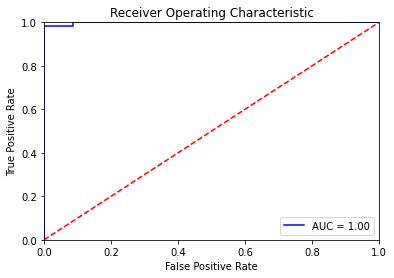

Confusion matrix, without normalization


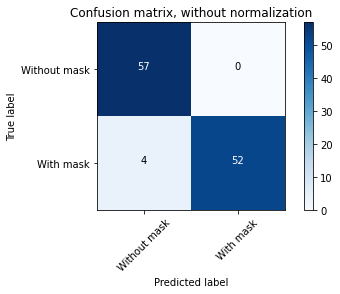

In [21]:
print_performance(mobileNetModel381Adam, out_x, out_y_test)

Accuracy:  0.9823
F1 score:  0.9818
Precision:  1.0
Recall:  0.9643


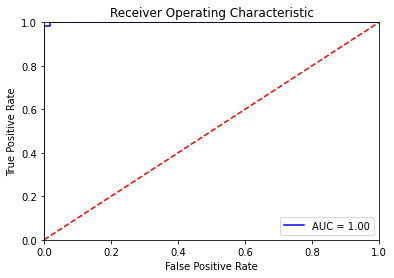

Confusion matrix, without normalization


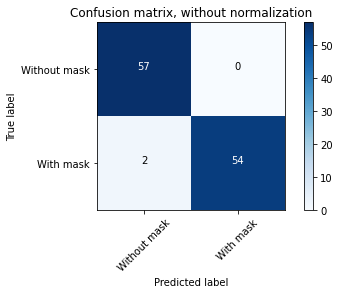

In [22]:
print_performance(mobileNetModel381, out_x, out_y_test)

Accuracy:  0.885
F1 score:  0.8785
Precision:  0.9216
Recall:  0.8393


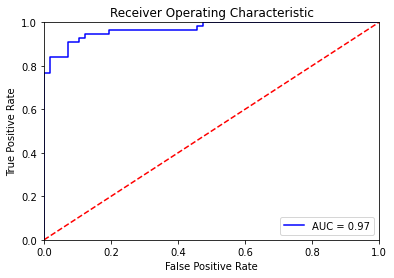

Confusion matrix, without normalization


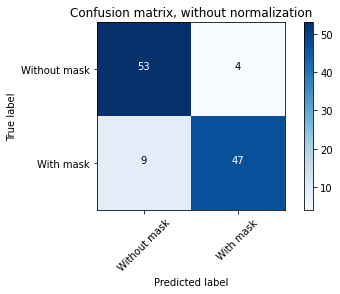

In [23]:
print_performance(ourOwnModel381Adam, out_x, out_y_test)

Accuracy:  0.8673
F1 score:  0.8624
Precision:  0.8868
Recall:  0.8393


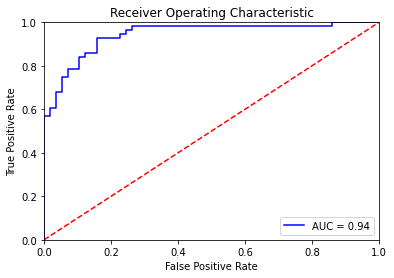

Confusion matrix, without normalization


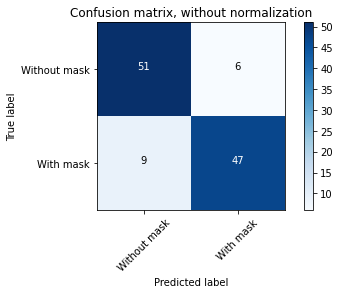

In [24]:
print_performance(ourOwnModel381, out_x, out_y_test)

Accuracy:  0.5044
F1 score:  0.0
Precision:  0.0
Recall:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


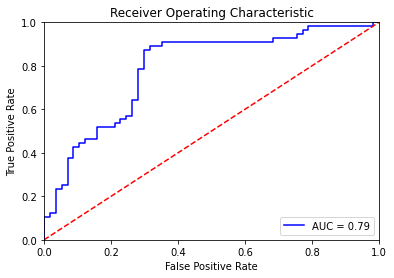

Confusion matrix, without normalization


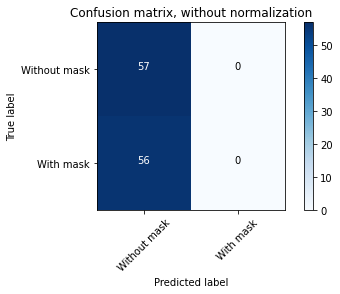

In [25]:
print_performance(ourOwnModel381Modified, out_x, out_y_test)

Accuracy:  0.4956
F1 score:  0.6627
Precision:  0.4956
Recall:  1.0


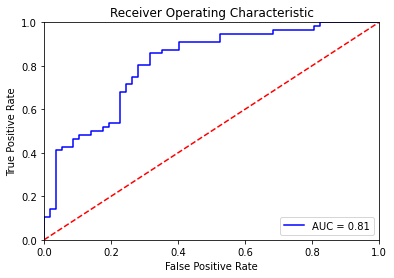

Confusion matrix, without normalization


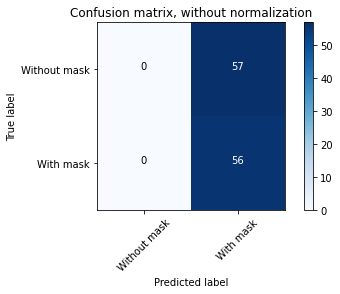

In [27]:
print_performance(ExtraTrainOurOwnModel381Modified, out_x, out_y_test)

Accuracy:  0.9469
F1 score:  0.9492
Precision:  0.9032
Recall:  1.0


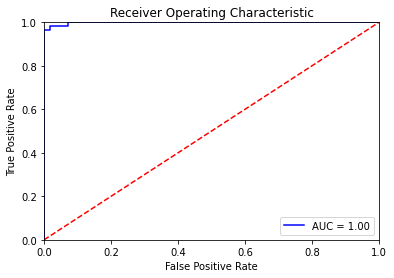

Confusion matrix, without normalization


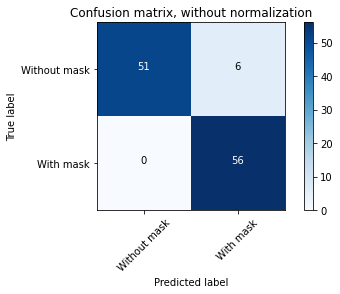

In [28]:
print_performance(ourOwnModel381fixed, out_x, out_y_test)

In [19]:
!unzip "/content/testingDataset.zip" -d "/content/"

Archive:  /content/testingDataset.zip
   creating: /content/testingDataset/
   creating: /content/testingDataset/without_mask/
  inflating: /content/testingDataset/without_mask/download (1).jfif  
  inflating: /content/testingDataset/without_mask/download (2).jfif  
  inflating: /content/testingDataset/without_mask/download (3).jfif  
  inflating: /content/testingDataset/without_mask/download (4).jfif  
  inflating: /content/testingDataset/without_mask/download (5).jfif  
  inflating: /content/testingDataset/without_mask/download (6).jfif  
  inflating: /content/testingDataset/without_mask/download (7).jfif  
  inflating: /content/testingDataset/without_mask/download (8).jfif  
  inflating: /content/testingDataset/without_mask/download.jfif  
  inflating: /content/testingDataset/without_mask/images (1).jfif  
  inflating: /content/testingDataset/without_mask/images (10).jfif  
  inflating: /content/testingDataset/without_mask/images (11).jfif  
  inflating: /content/testingDataset/with